tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT


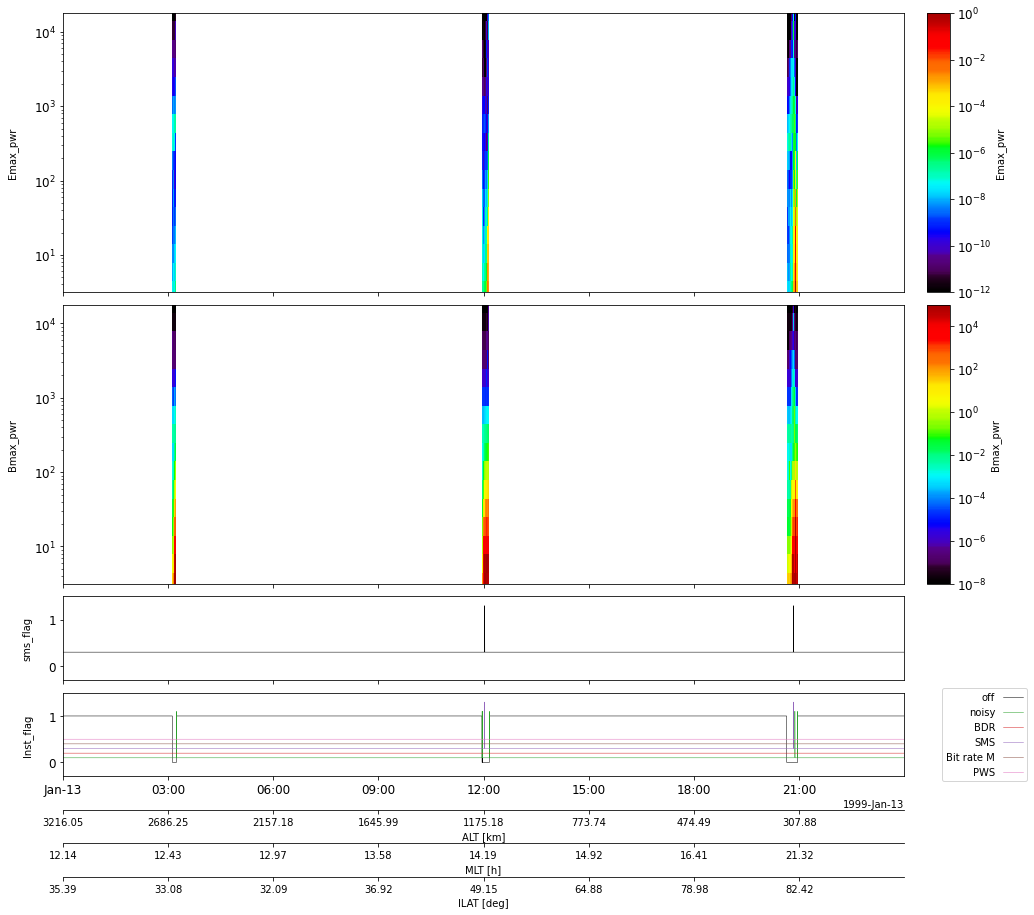

In [7]:
import load 
import pytplot
from pytplot import options, store_data, get_data
import pyspedas
import numpy as np
from pytplot.MPLPlotter.tplot import tplot

trange = ['1999-1-13', '1999-1-14']
load.mca(trange, spec_type='pwr', del_invalid_data=['off', 'noisy', 'SMS', 'BDR'])
load.orb(trange)

postgap = get_data('PostGap')
postgap_array = np.empty([postgap.y.size, 6])
for i in range(postgap.y.size):
    postgap_str = format(postgap.y[i], '08b')
    #"off"               "noisy",             "BDR",               "SMS",               "Bit rate",          "PWS",    
    postgap_array[i][0], postgap_array[i][1], postgap_array[i][2], postgap_array[i][3], postgap_array[i][4], postgap_array[i][5] = \
    int(postgap_str[7]), int(postgap_str[6])+0.1, int(postgap_str[3])+0.2, int(postgap_str[2])+0.3, int(postgap_str[1])+0.4, int(postgap_str[0])+0.5 

store_data('Inst_flag', data = {'x':postgap.times, 'y':postgap_array})
store_data('sms_flag', data={'x':postgap.times, 'y':postgap_array.T[3]})
#set yaxis option "legend_location" as "spedas"
#a = pytplot.data_quants['Inst_flag']
#a.attrs['plot_options']['yaxis_opt']['legend_location'] = 'spedas'
options(['Inst_flag', 'sms_flag'], opt_dict={'yrange':[-0.3, 1.5], 'panel_size':0.3})
options('Inst_flag', opt_dict={'legend_names':['off', 'noisy', 'BDR', 'SMS', 'Bit rate M', 'PWS'], 'legend_location':'spedas'})

pyspedas.tinterpol('akb_ILAT', interp_to='Emax_pwr', newname = 'ILAT')
pyspedas.tinterpol('akb_MLAT', interp_to = 'Emax', newname = 'MLAT')
pyspedas.tinterpol('akb_MLT', interp_to = 'Emax', newname = 'MLT', method='nearest')
pyspedas.tinterpol('akb_ALT', interp_to = 'Emax', newname = 'ALT')

options('Emax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-12, 1]})
options('Bmax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-8, 1e5]})

options('ALT', 'ytitle', 'ALT [km]')
options('MLT', 'ytitle', 'MLT [h]')
options('ILAT', 'ytitle', 'ILAT [deg]')

pytplot.tlimit([trange[0]+' 00:00:00', trange[0]+' 23:59:00'])
fig, ax = tplot(['Emax_pwr','Bmax_pwr', 'sms_flag', 'Inst_flag'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 16, ysize = 20, return_plot_objects=True)


In [16]:
ax0 = ax[0]
ax0.xaxis

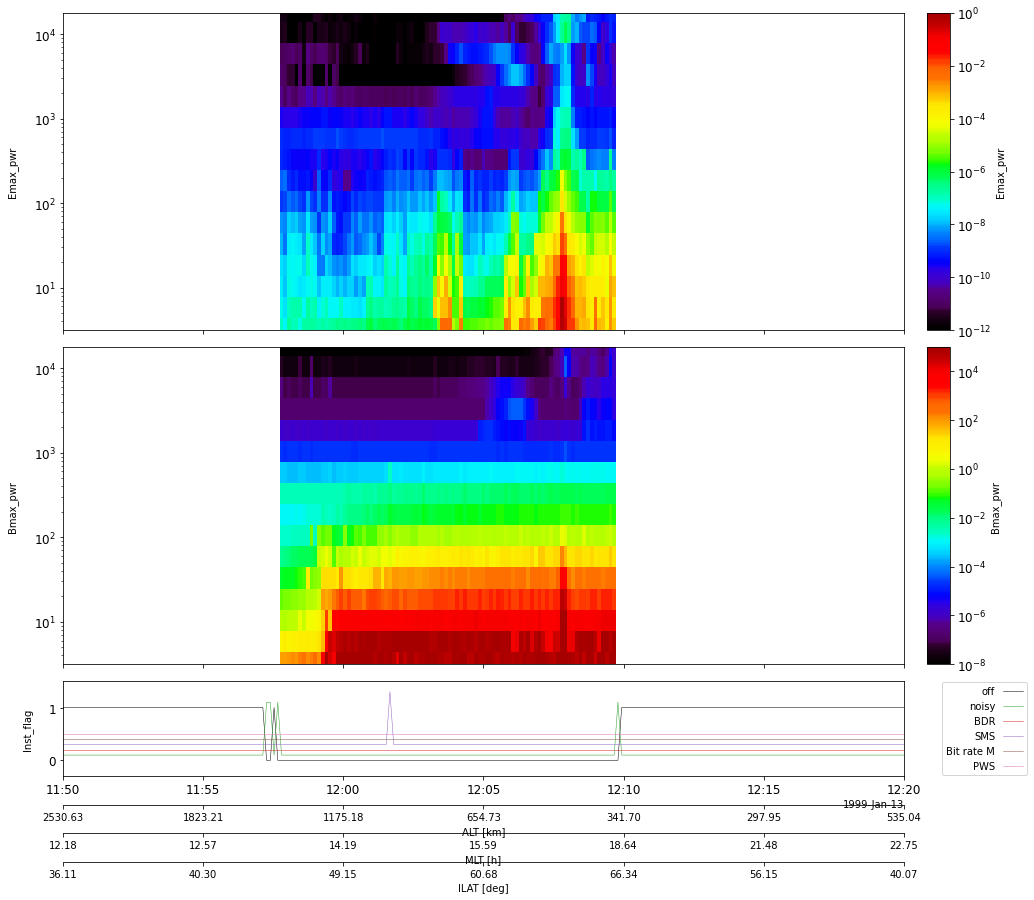

In [3]:
pytplot.tlimit([trange[0]+' 11:50:00', trange[0]+' 12:20:00'])
tplot(['Emax_pwr','Bmax_pwr', 'Inst_flag'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 16, ysize = 20)

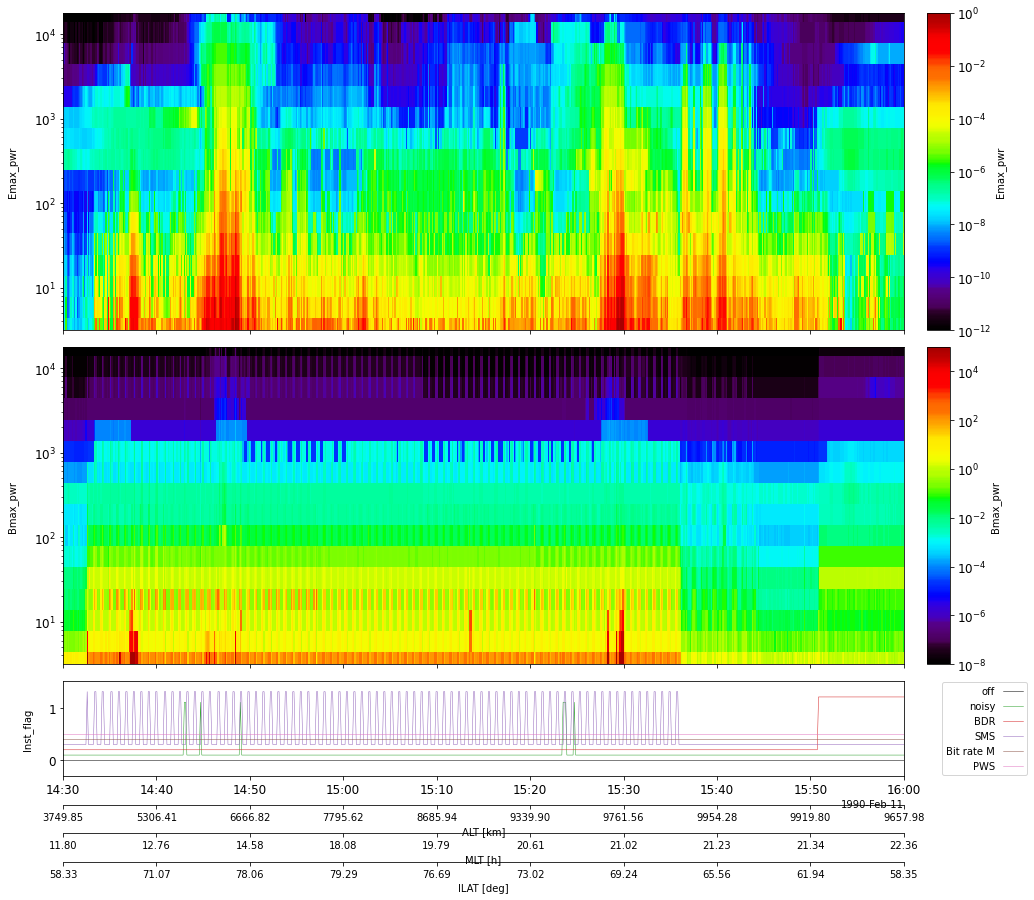

In [28]:
pytplot.tlimit([trange[0]+' 14:30:00', trange[0]+' 16:00:00'])
tplot(['Emax_pwr','Bmax_pwr', 'Inst_flag'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 16, ysize = 20)

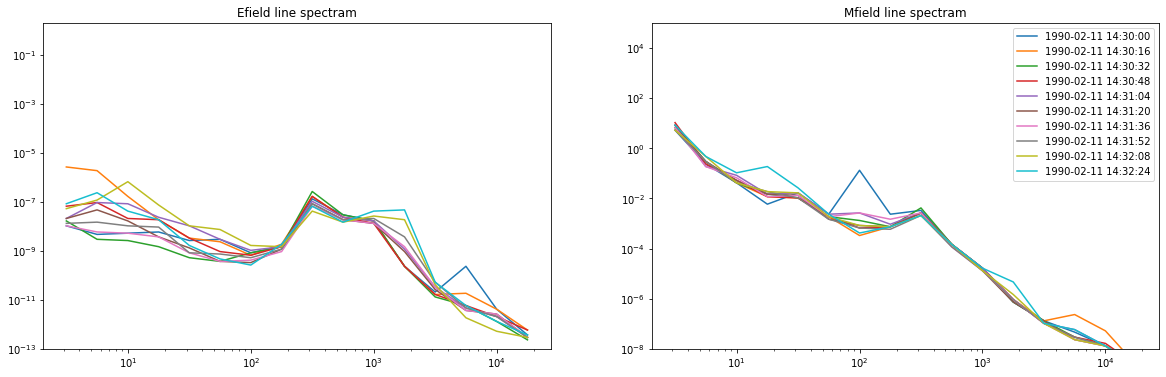

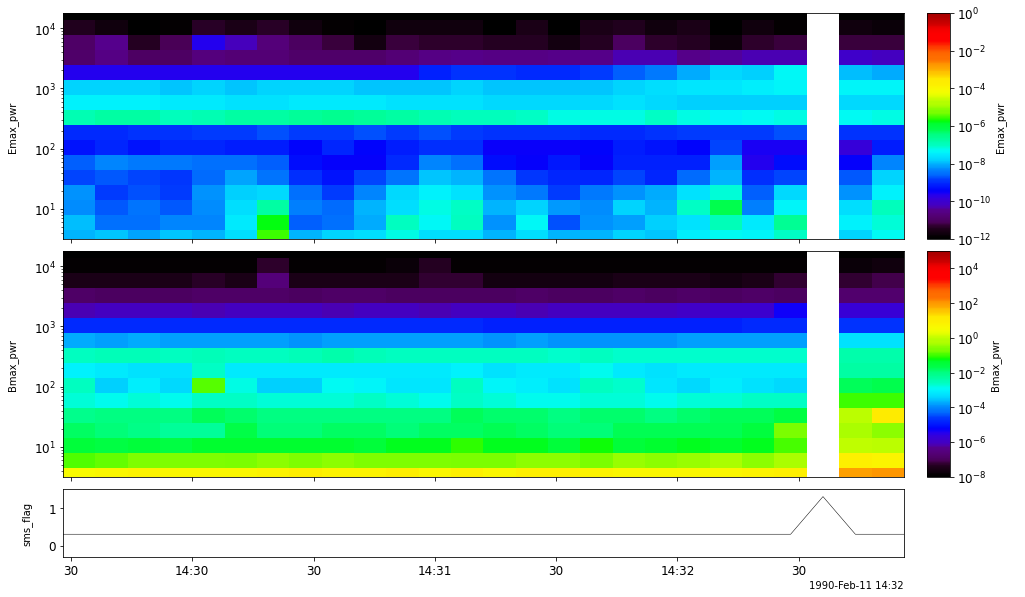

In [25]:
import load
import pyspedas
import pytplot
import matplotlib.pyplot as plt
from pytplot.MPLPlotter.tplot import tplot

trange = ['1990-2-11', '1990-2-12']
load.mca(trange = trange, del_invalid_data=['off', 'SMS'])
Emax_tvar = get_data('Emax_pwr')
Bmax_tvar = get_data('Bmax_pwr')

postgap = get_data('PostGap')
postgap_array = np.empty([postgap.y.size, 6])
for i in range(postgap.y.size):
    postgap_str = format(postgap.y[i], '08b')
    #"off"               "noisy",             "BDR",               "SMS",               "Bit rate",          "PWS",    
    postgap_array[i][0], postgap_array[i][1], postgap_array[i][2], postgap_array[i][3], postgap_array[i][4], postgap_array[i][5] = \
    int(postgap_str[7]), int(postgap_str[6])+0.1, int(postgap_str[3])+0.2, int(postgap_str[2])+0.3, int(postgap_str[1])+0.4, int(postgap_str[0])+0.5 

store_data('Inst_flag', data = {'x':postgap.times, 'y':postgap_array})
store_data('sms_flag', data={'x':postgap.times, 'y':postgap_array.T[3]})
#set yaxis option "legend_location" as "spedas"
#a = pytplot.data_quants['Inst_flag']
#a.attrs['plot_options']['yaxis_opt']['legend_location'] = 'spedas'
options(['Inst_flag', 'sms_flag'], opt_dict={'yrange':[-0.3, 1.5], 'panel_size':0.3})
options('Inst_flag', opt_dict={'legend_names':['off', 'noisy', 'BDR', 'SMS', 'Bit rate M', 'PWS'], 'legend_location':'spedas'})

start_time = pyspedas.time_double(['1990-02-11'])

#no sms interference
hr, tens_of_min = 14, 3 #min shuld be 0, 1, 2, 3, 4 or 5 + 0, 0.2, 0.4, 0.6, 0.8
slice_time_index = 450*hr + 75*tens_of_min
slice_time = start_time[0] + slice_time_index * 8

fig = plt.figure(figsize=[20, 6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(10):
    ax1.plot(Emax_tvar.v, Emax_tvar.y[slice_time_index+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
    ax2.plot(Bmax_tvar.v, Bmax_tvar.y[slice_time_index+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('Efield line spectram')
ax1.set_ylim(1e-13, 2)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title('Mfield line spectram')
ax2.set_ylim(1e-8, 1e5)
ax2.legend()

options('Emax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-12, 1]})
options('Bmax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-8, 1e5]})

pytplot.tlimit([slice_time-32, slice_time+22*8])
tplot(['Emax_pwr','Bmax_pwr', 'sms_flag'], xsize=16)

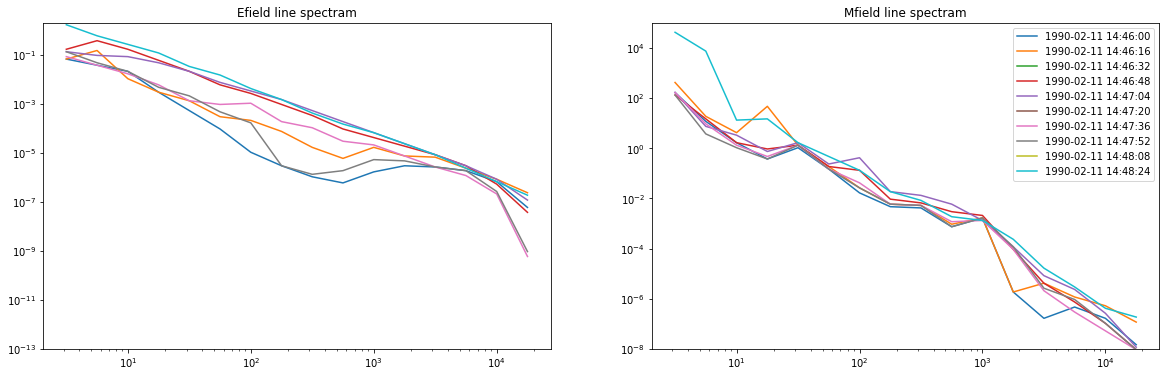

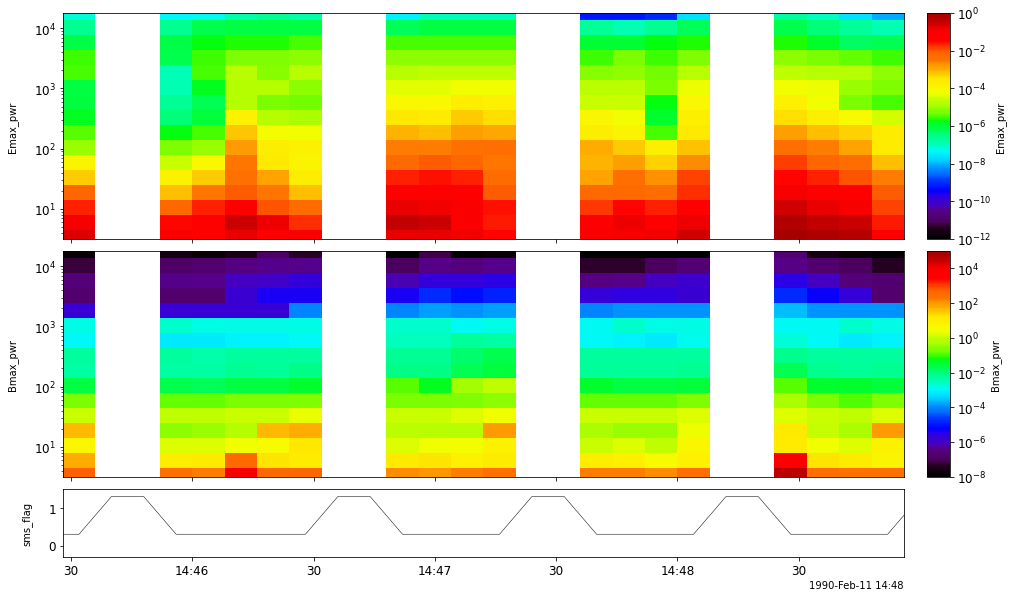

In [26]:
#sms interference
hr, tens_of_min = 14, 4.6 #min shuld be 0, 1, 2, 3, 4 or 5 + 0, 0.2, 0.4, 0.6, 0.8
slice_time_index = 450*hr + 75*tens_of_min
slice_time = start_time[0] + slice_time_index * 8

fig = plt.figure(figsize=[20, 6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(10):
    ax1.plot(Emax_tvar.v, Emax_tvar.y[int(slice_time_index)+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
    ax2.plot(Bmax_tvar.v, Bmax_tvar.y[int(slice_time_index)+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('Efield line spectram')
ax1.set_ylim(1e-13, 2)


ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title('Mfield line spectram')
ax2.set_ylim(1e-8, 1e5)
ax2.legend()

options('Emax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-12, 1]})
options('Bmax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-8, 1e5]})

pytplot.tlimit([slice_time-32, slice_time+22*8])
tplot(['Emax_pwr','Bmax_pwr', 'sms_flag'], xsize=16)

cdf内の情報を読み取る方法

In [2]:
from pytplot import cdf_to_tplot
import pytplot
cdf_to_tplot('./Akebono_MCA_data/ak_h1_mca_19890101_v02.cdf')
gatt = get_data('Eave', metadata=True)['CDF']['VATT']
pytplot.data_quants['Eave']

<xarray.DataArray 'Eave' (time: 10800, v_dim: 16)>
array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
Coordinates:
  * time       (time) float64 5.996e+08 5.996e+08 ... 5.997e+08 5.997e+08
    spec_bins  (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
    v          (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Dimensions without coordinates: v_dim
Attributes:
    CDF:           {'VATT': {'AVG_TYPE': 'log', 'CATDESC': 'Electric field av...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In [1]:
import load 
import pytplot
import pyspedas
import numpy as np

trange = ['1990-2-11', '1990-2-12']
load.mca(trange, del_invalid_data=True)
load.orb(trange)
tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']
for i in range(4):
    tplot_variable = pytplot.get_data(tplot_names[i])
    tplot_variable_float = (tplot_variable.y).astype(float)
    np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
    tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2) / bandwidth
    pytplot.store_data(tplot_names[i] +'_amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
    pytplot.store_data(tplot_names[i] +'_pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})

try:
    pyspedas.tinterpol('akb_ILAT', interp_to='Emax_pwr', newname = 'ILAT')
except:
    print('orbit file is not perfect')
pyspedas.tinterpol('akb_MLAT', interp_to = 'Emax', newname = 'MLAT')
pyspedas.tinterpol('akb_MLT', interp_to = 'Emax', newname = 'MLT', method = 'nearest')
pyspedas.tinterpol('akb_ALT', interp_to = 'Emax', newname = 'ALT')

pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'spec', 1)
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'ylog', 1)
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'zlog', 1)
pytplot.options('Emax_pwr', 'ztitle', 'Electric field PSD \n [(mV/m)^2/Hz]')
pytplot.options('Emax_pwr', 'zrange', [1e-6, 1])
pytplot.options('Bmax_pwr', 'ztitle', 'Magnetic field PSD \n [(pT)^2/Hz]')
pytplot.options('Bmax_pwr', 'zrange', [1e-8, 1e1])
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'ytitle', 'freq [Hz]')
pytplot.tlimit([trange[0]+' 18:00:00', trange[0]+' 18:15:00'])

postgap = pytplot.get_data('PostGap')
postgap_array = np.empty([postgap.y.size, 8])
for i in range(postgap.y.size):
    postgap_str = format(postgap.y[i], '08b')
    #"off"               "noisy",                  "BDR",                   "SMS",                    "Bit rate",              "PWS",                    "3bit",              "4bit"
    postgap_array[i][0], postgap_array[i][1],      postgap_array[i][2],     postgap_array[i][3],      postgap_array[i][4],     postgap_array[i][5],      postgap_array[i][6], postgap_array[i][7] = \
    int(postgap_str[7]), int(postgap_str[6])+0.05, int(postgap_str[3])+0.1, int(postgap_str[2])+0.15, int(postgap_str[1])+0.2, int(postgap_str[0])+0.25, int(postgap_str[4])-0.2, int(postgap_str[5])-0.25, 
pytplot.store_data('postgap', data={'x':postgap.times, 'y':postgap_array}) 

pytplot.options('postgap', 'Color', ['r','g','b','m','y','c','k','k'])
pytplot.options('postgap', 'legend_names', ["off", "noisy", "BDR", "SMS", "Bit rate", "PWS", "3bit", '4bit'])
pytplot.options('postgap', 'legend_location', 'spedas')
pytplot.options('postgap', 'yrange', [-0.3, 1.7])
pytplot.options('postgap', 'thick', 1.0)

pytplot.options(['ALT', 'MLT', 'ILAT'], 'panel_size', 0.3)
pytplot.options(['Bmax_pwr', 'Emax_pwr', 'postgap'], 'panel_size', 1.0)
pytplot.options('ALT', 'ytitle', 'ALT [km]')
pytplot.options('MLT', 'ytitle', 'MLT [h]')
pytplot.options('ILAT', 'ytitle', 'ILAT [deg]')
pytplot.tplot_options('vertical_spacing', 2)
pytplot.tplot_options('wsize', [1000, 1000])
pytplot.tplot(['Bmax_pwr', 'Emax_pwr', 'postgap'], var_label= ['ALT', 'MLT', 'ILAT'], save_png = 'test_1000-1000.png')




QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-www'
30-Sep-22 15:09:23: /home/www/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



[]
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT


30-Sep-22 15:09:26: /home/www/.local/lib/python3.8/site-packages/pytplot/tplot_utilities.py:312: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  map = [(np.array(cm(x))*255).astype(np.int) for x in range(0, cm.N)]

30-Sep-22 15:09:29: /home/www/.local/lib/python3.8/site-packages/pytplot/tplot_utilities.py:312: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.i

In [15]:
ILAT = get_data('akb_ILAT')
ILAT.y

array([62.36, 63.16, 63.99, ..., 48.42, 48.33, 48.24])

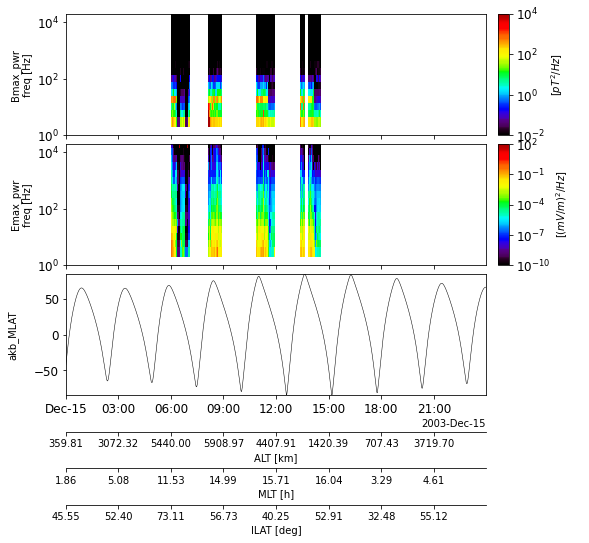

In [4]:
tlimit([date+' 00:00:00', date+' 23:59:00'])
tplot(['Bmax_pwr', 'Emax_pwr', 'akb_MLAT'], var_label = ['ALT', 'MLT', 'ILAT'])

In [39]:
pyspedas.tinterpol('akb_ILAT', interp_to='Emax_Amp', newname = 'ILAT')
pyspedas.tinterpol('akb_MLAT', interp_to='Emax_Amp', newname = 'MLAT')
Emax = get_data('Emax_Amp')
time, Emax = Emax.times, Emax.y
ILAT = get_data('ILAT')
ILAT = ILAT.y
MLAT = get_data('MLAT')
MLAT = MLAT.y

plus_index_tuple = np.where((MLAT>0) & (ILAT>65))
minus_index_tuple = np.where((MLAT<0) & (ILAT>65))

plus_index = plus_index_tuple[0]
minus_index = minus_index_tuple[0]

#make start_time list, end_time list
plus_start_time_index = [plus_index[0]]
plus_end_time_index = []
for i in range(plus_index.size-1):
    if plus_index[i+1] - plus_index[i] > 1:
        plus_end_time_index.append(plus_index[i])
        plus_start_time_index.append(plus_index[i+1])
        
plus_end_time_index.append(plus_index[-1])

plus_start_time_index = np.array(plus_start_time_index)
plus_end_time_index = np.array(plus_end_time_index)

plus_start_time_list = pyspedas.time_string(time[plus_start_time_index], fmt='%Y-%m-%d %H:%M:%S')
plus_end_time_list = pyspedas.time_string(time[plus_end_time_index], fmt='%Y-%m-%d %H:%M:%S')

plus_start_time_list[0], plus_end_time_list[0]

tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT


('1991-07-11 02:13:56', '1991-07-11 03:04:52')

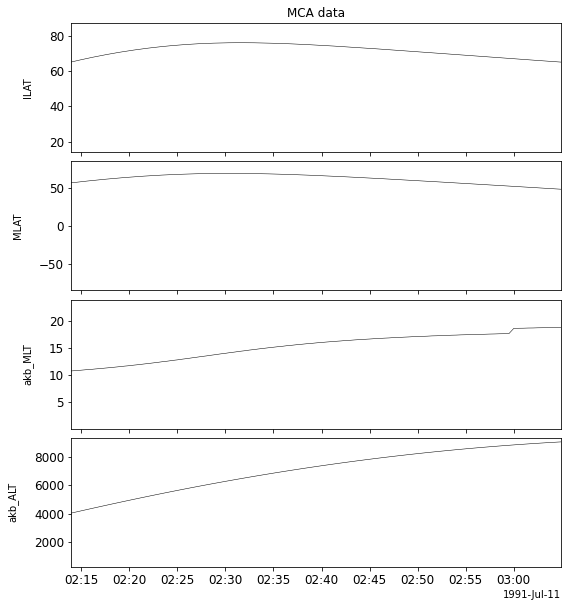

In [42]:
start_time = plus_start_time_list[0]
end_time = plus_end_time_list[0]
pytplot.tlimit([start_time,end_time])
pytplot.tplot(['ILAT', 'MLAT', 'akb_MLT', 'akb_ALT'])

In [63]:
Emax = get_data('Emax_Amp')
Emax.v, Emax.y.T[0].size
Emax_channel1 = Emax.y.T[0]
Emax_channel2 = Emax.y.T[1]
Emax_channel3 = Emax.y.T[2]
Emax_channel4 = Emax.y.T[3]
Emax_channel5 = Emax.y.T[4]
Emax_channel6 = Emax.y.T[5]
Emax_channel7 = Emax.y.T[6]

store_data(name = 'Emax_channel1', data={'x':time, 'y':Emax_channel1})
store_data(name = 'Emax_channel2', data={'x':time, 'y':Emax_channel2})
store_data(name = 'Emax_channel3', data={'x':time, 'y':Emax_channel3})
store_data(name = 'Emax_channel4', data={'x':time, 'y':Emax_channel4})
store_data(name = 'Emax_channel5', data={'x':time, 'y':Emax_channel5})
store_data(name = 'Emax_channel6', data={'x':time, 'y':Emax_channel6})
store_data(name = 'Emax_channel7', data={'x':time, 'y':Emax_channel7})

colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]

options('Emax_channel1', 'color', colorlist[0])
options('Emax_channel2', 'color', colorlist[1])
options('Emax_channel3', 'color', colorlist[2])
options('Emax_channel4', 'color', colorlist[3])
options('Emax_channel5', 'color', colorlist[4])
options('Emax_channel6', 'color', colorlist[5])
options('Emax_channel7', 'color', colorlist[6])

store_data(name = 'Amplitude at 3.16-100 Hz', 
           data=['Emax_channel1', 
                 'Emax_channel2', 
                 'Emax_channel3', 
                 'Emax_channel4', 
                 'Emax_channel5',
                 'Emax_channel6',
                 'Emax_channel7'])




True

In [ ]:
Emax = get_data('Emax_Amp')
Emax_channel1 = Emax.y.T[0] #3.16 Hz
Emax_channel2 = Emax.y.T[1] #5.62 Hz
Emax_channel3 = Emax.y.T[2] #10 Hz
Emax_channel4 = Emax.y.T[3] #17.8 Hz
Emax_channel5 = Emax.y.T[4] #31.6 Hz
Emax_channel6 = Emax.y.T[5] #56.2 Hz
Emax_channel7 = Emax.y.T[6] #100 Hz
Emax_channel8 = Emax.y.T[7] #178 Hz
Emax_channel9 = Emax.y.T[8] #316 Hz
Emax_channel10 = Emax.y.T[9] #562 Hz

store_data(name = 'Emax_lines', 
           data={'x': time,
                 'y':[Emax_channel1, 
                      Emax_channel2, 
                      Emax_channel3, 
                      Emax_channel4, 
                      Emax_channel5,
                      Emax_channel6,
                      Emax_channel7,
                      Emax_channel8,
                      Emax_channel9,
                      Emax_channel10]})